<a href="https://colab.research.google.com/github/jonnybegreat/test-repo/blob/master/Regression%20Predict%20-%20739%20score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import pickle
from sklearn.linear_model import LinearRegression

#Import Train Set and perform Preprocessing

In [503]:
train_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/Train.csv')
riders_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/Riders.csv')
train_df = train_df.merge(riders_df, how='left', on='Rider Id')
df = train_df
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
# Add columns with hour and minute for pickup time and convert to circular
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'],format='%I:%M:%S %p')
df['Pickup - Hour'] = df['Pickup - Time'].dt.hour.astype('float')
df['Pickup_XHour'] = [math.sin((2*math.pi*i)/24) for i in df["Pickup - Hour"]]
df['Pickup_YHour'] = [math.cos((2*math.pi*i)/24) for i in df["Pickup - Hour"]]
df['Pickup_XMonthday'] = [math.sin((2*math.pi*i)/31) for i in df["Pickup - Day of Month"]]
df['Pickup_YMonthday'] = [math.cos((2*math.pi*i)/31) for i in df["Pickup - Day of Month"]]
df['Pickup_Xweekday'] = [math.sin((2*math.pi*i)/7) for i in df["Pickup - Weekday (Mo = 1)"]]
df['Pickup_Yweekday'] = [math.cos((2*math.pi*i)/7) for i in df["Pickup - Weekday (Mo = 1)"]]
#df['Pickup - Minute'] = df['Pickup - Time'].dt.minute.astype('float')

In [0]:
# replace missing values in temp column with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(df[['Temperature']])
df['Temperature'] = imputer.transform(df[['Temperature']])

# replace missing values in precip column with 0 (not raining)
imputer2 = SimpleImputer(missing_values = np.nan,strategy = 'constant')
imputer2 = imputer2.fit(df[['Precipitation in millimeters']])
df['Precipitation in millimeters'] = imputer2.transform(df[['Precipitation in millimeters']])

In [506]:
df.head(25)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Pickup - Hour,Pickup_XHour,Pickup_YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,1900-01-01 10:27:30,9,5,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,10.0,5.000000e-01,-0.866025,0.968077,-0.250653,-0.974928,-0.222521
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,1900-01-01 11:44:09,12,5,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,11.0,2.588190e-01,-0.965926,0.651372,-0.758758,-0.974928,-0.222521
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,1900-01-01 12:53:03,30,2,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,12.0,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,1900-01-01 09:43:06,15,5,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,9.0,7.071068e-01,-0.707107,0.101168,-0.994869,-0.974928,-0.222521
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,1900-01-01 10:05:23,13,1,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,10.0,5.000000e-01,-0.866025,0.485302,-0.874347,0.781831,0.623490
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,3:21:36 PM,14,5,1900-01-01 15:30:30,14,5,4:23:41 PM,9,27.200000,0.0,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191,3288,1204,14.2,1056,15.0,-7.071068e-01,-0.707107,0.299363,-0.954139,-0.974928,-0.222521
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,9:49:47 AM,9,5,9:53:12 AM,9,5,1900-01-01 09:56:45,9,5,10:19:45 AM,5,20.300000,0.0,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380,288,556,13.7,27,9.0,7.071068e-01,-0.707107,0.968077,-0.250653,-0.974928,-0.222521
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,2:14:13 PM,11,1,2:21:33 PM,11,1,1900-01-01 14:22:40,11,1,2:33:26 PM,3,28.700000,0.0,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646,4036,2119,14.4,700,14.0,-5.000000e-01,-0.866025,0.790776,-0.612106,0.781831,0.623490
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,11:15:49 AM,30,2,12:13:18 PM,30,2,1900-01-01 12:22:57,30,2,1:19:35 PM,9,23.258889,0.0,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398,162,237,15.0,14,12.0,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,5:17:56 PM,23,5,5:32:41 PM,23,5,1900-01-01 17:34:38,23,5,6:31:57 PM,14,24.600000,0.0,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439,1062,573,13.2,100,17.0,-9.659258e-01,-0.258819,-0.998717,-0.050649,-0.974928,-0.222521


In [507]:
# only use rows where vehicle type = Bike
df = df[df['Vehicle Type'] == 'Bike']
df.shape

(21201, 40)

In [508]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Pickup - Hour', 'Pickup_XHour', 'Pickup_YHour',
       'Pickup_XMonthday', 'Pickup_YMonthday', 'Pickup_Xweekday',
       'Pic

In [0]:
# Remove unnecessary columns
df = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)','Age',
       'Arrival at Destination - Time', 'Rider Id','No_of_Ratings','Precipitation in millimeters',
       'Pickup - Hour'],axis = 1)

In [510]:
df.head()

,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Average_Rating,Pickup_XHour,Pickup_YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday
0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,1637,13.8,5.000000e-01,-0.866025,0.968077,-0.250653,-0.974928,-0.222521
1,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,396,13.6,2.588190e-01,-0.965926,0.651372,-0.758758,-0.974928,-0.222521
2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,1023,12.5,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521
3,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,886,14.5,7.071068e-01,-0.707107,0.101168,-0.994869,-0.974928,-0.222521
4,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2311,14.1,5.000000e-01,-0.866025,0.485302,-0.874347,0.781831,0.623490


In [0]:
# Move response variable column to last column
r_variable = 'Time from Pickup to Arrival'
column_titles = [col for col in df.columns if col!= r_variable] + [r_variable]
df = df.reindex(columns=column_titles)

In [0]:
# Remove spaces, parentheses,equal signs, and dashes
df.columns = [col.replace("(","") for col in df.columns]
df.columns = [col.replace(")","") for col in df.columns]
df.columns = [col.replace("=","") for col in df.columns]
df.columns = [col.replace("-","") for col in df.columns]
df.columns = [col.replace(" ","_") for col in df.columns]
df.columns = [col.replace(".","") for col in df.columns]


In [513]:
df.describe()

,Distance_KM,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Average_Rating,Pickup_XHour,Pickup_YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday,Time_from_Pickup_to_Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1692.423706,13.882520,-0.174295,-0.775840,0.045540,-0.016332,0.084717,-0.269505,1556.920947
std,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,1574.308302,0.916071,0.551290,0.252568,0.713322,0.699199,0.751883,0.595740,987.270788
min,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,2.000000,0.000000,-1.000000,-1.000000,-0.998717,-0.994869,-0.974928,-0.900969,1.000000
25%,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,557.000000,13.600000,-0.707107,-0.965926,-0.651372,-0.758758,-0.433884,-0.900969,882.000000
50%,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1212.000000,14.000000,-0.258819,-0.866025,0.101168,-0.050649,0.433884,-0.222521,1369.000000
75%,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2311.000000,14.300000,0.258819,-0.707107,0.790776,0.688967,0.781831,-0.222521,2040.000000
max,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,9756.000000,15.200000,0.965926,1.000000,0.998717,1.000000,0.974928,1.000000,7883.000000


## Check Stats

In [514]:
# Create Equation for use of Statsmodel Package

import statsmodels.formula.api as sm
formula_str = df.columns[-1]+' ~ '+'+'.join(df.columns[:-1])
formula_str

'Time_from_Pickup_to_Arrival ~ Distance_KM+Temperature+Pickup_Lat+Pickup_Long+Destination_Lat+Destination_Long+No_Of_Orders+Average_Rating+Pickup_XHour+Pickup_YHour+Pickup_XMonthday+Pickup_YMonthday+Pickup_Xweekday+Pickup_Yweekday'

In [515]:

from statsmodels.formula.api import ols

# Fit the model using the model dataframe
model=ols(formula=formula_str, data=df)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())
print(fitted)


                                 OLS Regression Results                                
Dep. Variable:     Time_from_Pickup_to_Arrival   R-squared:                       0.348
Model:                                     OLS   Adj. R-squared:                  0.347
Method:                          Least Squares   F-statistic:                     807.4
Date:                         Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                                 07:32:20   Log-Likelihood:            -1.7173e+05
No. Observations:                        21201   AIC:                         3.435e+05
Df Residuals:                            21186   BIC:                         3.436e+05
Df Model:                                   14                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Correlation and Significance


In [0]:
#sns.pairplot(df)


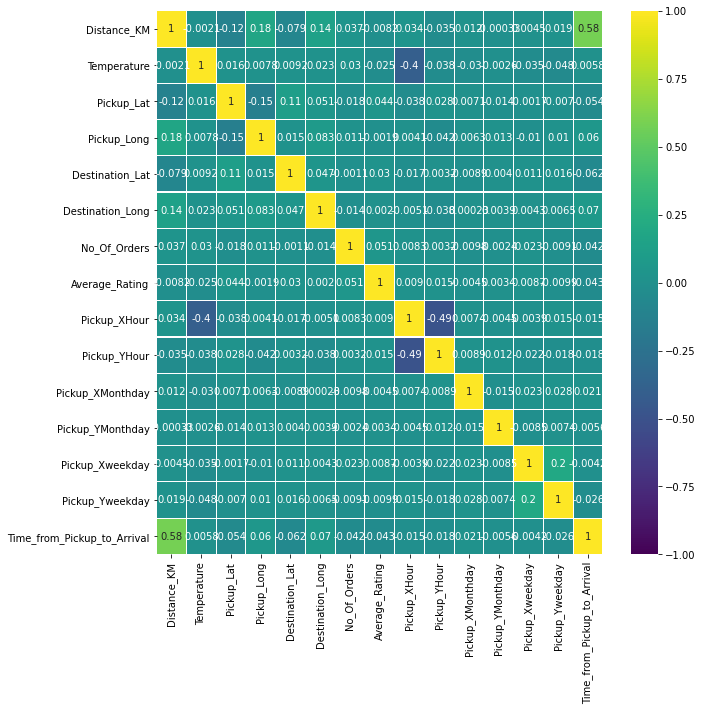

In [517]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [0]:
# Calculate correlations between predictor variables and the response variable
corrs = df.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

In [519]:

from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time_from_Pickup_to_Arrival']
for col in column_titles:
    p_val = round(pearsonr(df[col], df['Time_from_Pickup_to_Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]


,Correlation_Coefficient,P_Value
Distance_KM,0.580608,0.000000
Destination_Long,0.070425,0.000000
Pickup_Long,0.060285,0.000000
No_Of_Orders,-0.041608,0.000000
Average_Rating,-0.042559,0.000000
Pickup_Lat,-0.053823,0.000000
Destination_Lat,-0.061872,0.000000
Pickup_Yweekday,-0.025897,0.000162
Pickup_XMonthday,0.021230,0.001992
Pickup_YHour,-0.017611,0.010340


In [0]:
corr = df.drop('Time_from_Pickup_to_Arrival', axis='columns').corr()

In [0]:
from statsmodels.graphics.correlation import plot_corr

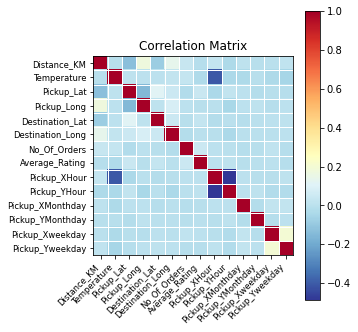

In [522]:
fig=plot_corr(corr,xnames=corr.columns)

## Split into train and test

In [523]:
df.columns

Index(['Distance_KM', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Average_Rating',
       'Pickup_XHour', 'Pickup_YHour', 'Pickup_XMonthday', 'Pickup_YMonthday',
       'Pickup_Xweekday', 'Pickup_Yweekday', 'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [524]:
[i for i in df.columns if i != 'Time_from_Pickup_to_Arrival']

['Distance_KM',
 'Temperature',
 'Pickup_Lat',
 'Pickup_Long',
 'Destination_Lat',
 'Destination_Long',
 'No_Of_Orders',
 'Average_Rating',
 'Pickup_XHour',
 'Pickup_YHour',
 'Pickup_XMonthday',
 'Pickup_YMonthday',
 'Pickup_Xweekday',
 'Pickup_Yweekday']

In [525]:
#X = df[[i for i in df.columns if i != 'Time_from_Pickup_to_Arrival']]
#y = df[['Time_from_Pickup_to_Arrival']]
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X[1])

[ 1.60000000e+01  2.64000000e+01 -1.35145300e+00  3.68993150e+01
 -1.29500410e+00  3.68143583e+01  3.96000000e+02  1.36000000e+01
  2.58819045e-01 -9.65925826e-01  6.51372483e-01 -7.58758123e-01
 -9.74927912e-01 -2.22520934e-01]


In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


In [0]:
from sklearn import datasets
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.15,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [529]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 752.395801


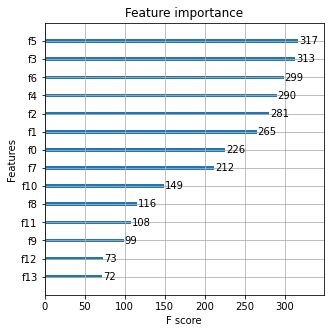

In [530]:
xgb.plot_importance(best_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [531]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.4,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1694.630046,4.594935,1695.146850,10.124597
1,1563.801595,4.437041,1564.792481,11.315258
2,1452.823893,9.229665,1454.393392,8.597029
3,1356.835449,5.512958,1359.144246,12.014353
4,1273.331258,5.408821,1276.421997,15.141150
5,1202.092529,6.820628,1206.440715,15.330542
6,1138.085775,8.333053,1143.310506,12.844987
7,1081.039063,6.411216,1087.337321,16.252165
8,1034.413859,9.175321,1041.693726,13.018875
9,990.863118,8.461746,998.834920,13.506383


In [532]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=12, random_state=None, shuffle=False)


In [533]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse1 = 10**10
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

  regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.15,
                max_depth = 5, alpha = 10, n_estimators = 100)
  y_pred = xg_reg.predict(X_test)

  mse = mean_squared_error(y_test,y_pred)
  rmse = mse**(.5)
  r2 = r2_score(y_test, y_pred)
  #print(r2)
  #print(mse1)      
  if rmse < mse1 :
    print(rmse)
    mse1 = rmse
    best_model = regressor.fit(X_train, y_train)
    y_pred1 = y_pred
    y_test1 = y_test
    
  else:
    pass
print(best_model)


724.5379849958913
721.3854428951685
688.0204618209024
682.9409384205342
658.1555085898109
653.7728012237113
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [534]:
df.head()

,Distance_KM,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Average_Rating,Pickup_XHour,Pickup_YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday,Time_from_Pickup_to_Arrival
0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,1637,13.8,5.000000e-01,-0.866025,0.968077,-0.250653,-0.974928,-0.222521,745
1,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,396,13.6,2.588190e-01,-0.965926,0.651372,-0.758758,-0.974928,-0.222521,1993
2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,1023,12.5,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521,455
3,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,886,14.5,7.071068e-01,-0.707107,0.101168,-0.994869,-0.974928,-0.222521,1341
4,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,2311,14.1,5.000000e-01,-0.866025,0.485302,-0.874347,0.781831,0.623490,1214


## Train Model

In [535]:
'''
#Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

#Prediction code is diff

y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

'''

'\n#Polynomial\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\npoly_reg = PolynomialFeatures(degree = 2)\nX_poly = poly_reg.fit_transform(X_train)\nregressor = LinearRegression()\nregressor.fit(X_poly, y_train)\n\n#Prediction code is diff\n\ny_pred = regressor.predict(poly_reg.transform(X_test))\nnp.set_printoptions(precision=2)\nprint(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))\n\n'

In [536]:
'''
#MLR
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
'''

'\n#MLR\nfrom sklearn.linear_model import LinearRegression\nregressor = LinearRegression()\nregressor.fit(X_train, y_train)\n'

In [537]:
'''
#Random Forrest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,random_state=0)
regressor.fit(X_train, y_train)
'''

'\n#Random Forrest\nfrom sklearn.ensemble import RandomForestRegressor\nregressor = RandomForestRegressor(n_estimators = 100,random_state=0)\nregressor.fit(X_train, y_train)\n'

In [538]:
'''
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
'''

"\nfrom sklearn.svm import SVR\nregressor = SVR(kernel = 'rbf')\nregressor.fit(X_train, y_train)\n"

In [539]:
'''
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
'''

'\n# Decision Tree\nfrom sklearn.tree import DecisionTreeRegressor\nregressor = DecisionTreeRegressor(random_state = 0)\nregressor.fit(X_train, y_train)\n'

In [540]:
'''
y_pred = best_model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
'''

'\ny_pred = best_model.predict(X_test)\nnp.set_printoptions(precision=2)\nprint(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))\n'

## Metrics

In [0]:
#from sklearn.metrics import r2_score
#r2_score(y_test1, y_pred1)

In [542]:
'''
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test1, y_pred1)
rmse = mse**(.5)
print(rmse)
'''

'\nfrom sklearn.metrics import mean_squared_error\nmse = mean_squared_error(y_test1, y_pred1)\nrmse = mse**(.5)\nprint(rmse)\n'

## Predict from Test data set given




In [0]:
test_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/Test.csv')
test_df.head()
test_df2 = test_df.copy()


test_df = test_df.merge(riders_df, how='left', on='Rider Id')

In [0]:
test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'],format='%I:%M:%S %p')
test_df['Pickup - Hour'] = test_df['Pickup - Time'].dt.hour.astype('float')
test_df['Pickup - XHour'] = [math.sin((2*math.pi*i)/24) for i in test_df["Pickup - Hour"]]
test_df['Pickup - YHour'] = [math.cos((2*math.pi*i)/24) for i in test_df["Pickup - Hour"]]
test_df['Pickup_XMonthday'] = [math.sin((2*math.pi*i)/31) for i in test_df["Pickup - Day of Month"]]
test_df['Pickup_YMonthday'] = [math.cos((2*math.pi*i)/31) for i in test_df["Pickup - Day of Month"]]
test_df['Pickup_Xweekday'] = [math.sin((2*math.pi*i)/7) for i in test_df["Pickup - Weekday (Mo = 1)"]]
test_df['Pickup_Yweekday'] = [math.cos((2*math.pi*i)/7) for i in test_df["Pickup - Weekday (Mo = 1)"]]

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(test_df[['Temperature']])
test_df['Temperature'] = imputer.transform(test_df[['Temperature']])



imputer2 = SimpleImputer(missing_values = np.nan,strategy = 'constant')
imputer2 = imputer2.fit(test_df[['Precipitation in millimeters']])
#test_df['Precipitation in millimeters'] = imputer2.transform(test_df[['Precipitation in millimeters']])

In [546]:
test_df = test_df[test_df['Vehicle Type'] == 'Bike']
test_df.columns
'''
'Distance_KM', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Average_Rating',
       'Pickup_XMonthday', 'Pickup_YMonthday', 'Time_from_Pickup_to_Arrival'
       '''

"\n'Distance_KM', 'Temperature', 'Pickup_Lat', 'Pickup_Long',\n       'Destination_Lat', 'Destination_Long', 'No_Of_Orders', 'Average_Rating',\n       'Pickup_XMonthday', 'Pickup_YMonthday', 'Time_from_Pickup_to_Arrival'\n       "

In [0]:
# Remove unnecessary columns
test_df = test_df.drop(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Rider Id','No_of_Ratings','Precipitation in millimeters','Age',
       'Pickup - Hour'],axis = 1)

In [0]:
test_df.columns = [col.replace("(","") for col in test_df.columns]
test_df.columns = [col.replace(")","") for col in test_df.columns]
test_df.columns = [col.replace("=","") for col in test_df.columns]
test_df.columns = [col.replace("-","") for col in test_df.columns]
test_df.columns = [col.replace(" ","_") for col in test_df.columns]
test_df.columns = [col.replace(".","") for col in test_df.columns]

In [549]:
test_df.head()

,Distance_KM,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Average_Rating,Pickup__XHour,Pickup__YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday
0,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,13.3,-0.965926,-0.258819,-0.724793,0.688967,0.433884,-0.900969
1,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,488,14.4,-0.258819,-0.965926,-0.299363,-0.954139,-0.974928,-0.222521
2,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,833,13.1,0.258819,-0.965926,-0.724793,0.688967,-0.433884,-0.900969
3,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,487,13.7,-0.500000,-0.866025,-0.299363,-0.954139,0.781831,0.623490
4,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,4761,14.1,0.258819,-0.965926,0.790776,-0.612106,0.974928,-0.222521


In [550]:
df.head()

,Distance_KM,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Average_Rating,Pickup_XHour,Pickup_YHour,Pickup_XMonthday,Pickup_YMonthday,Pickup_Xweekday,Pickup_Yweekday,Time_from_Pickup_to_Arrival
0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,1637,13.8,5.000000e-01,-0.866025,0.968077,-0.250653,-0.974928,-0.222521,745
1,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,396,13.6,2.588190e-01,-0.965926,0.651372,-0.758758,-0.974928,-0.222521,1993
2,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,1023,12.5,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521,455
3,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,886,14.5,7.071068e-01,-0.707107,0.101168,-0.994869,-0.974928,-0.222521,1341
4,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,2311,14.1,5.000000e-01,-0.866025,0.485302,-0.874347,0.781831,0.623490,1214


In [551]:
  '''
  from sklearn.preprocessing import StandardScaler
  scX = StandardScaler()
  scy = StandardScaler()
  scX.fit(X_train[:,[0,1,2,3,5,6,7,8,9]])
  X_train[:,[0,1,2,3,5,6,7,8,9]] = scX.fit_transform(X_train[:,[0,1,2,3,5,6,7,8,9]])
  X_test[:,[0,1,2,3,5,6,7,8,9]] = scX.transform(X_test[:,[0,1,2,3,5,6,7,8,9]])
  y_train = scy.fit_transform(y_train.reshape(-1,1))
  y_test = scy.transform(y_test.reshape(-1,1))
  '''

'\nfrom sklearn.preprocessing import StandardScaler\nscX = StandardScaler()\nscy = StandardScaler()\nscX.fit(X_train[:,[0,1,2,3,5,6,7,8,9]])\nX_train[:,[0,1,2,3,5,6,7,8,9]] = scX.fit_transform(X_train[:,[0,1,2,3,5,6,7,8,9]])\nX_test[:,[0,1,2,3,5,6,7,8,9]] = scX.transform(X_test[:,[0,1,2,3,5,6,7,8,9]])\ny_train = scy.fit_transform(y_train.reshape(-1,1))\ny_test = scy.transform(y_test.reshape(-1,1))\n'

In [552]:
X_test_real = test_df.iloc[:,:].values
'''
X_test_real = test_df.iloc[:,:].values
scX = StandardScaler()
scX.fit(X_test_real[:,[0,1,2,3,5,6,7,8]])
X_test_real[:,[0,1,2,3,5,6,7,8]] = scX.transform(X_test_real[:,[0,1,2,3,5,6,7,8]])
print(X_test_real)
'''

'\nX_test_real = test_df.iloc[:,:].values\nscX = StandardScaler()\nscX.fit(X_test_real[:,[0,1,2,3,5,6,7,8]])\nX_test_real[:,[0,1,2,3,5,6,7,8]] = scX.transform(X_test_real[:,[0,1,2,3,5,6,7,8]])\nprint(X_test_real)\n'

In [553]:
y_pred_real = best_model.predict(X_test_real)

print(y_pred_real)

[1676.6859 1229.6724 1523.3145 ... 1682.7346 2484.7122 1683.4662]


## Format and Export Results into csv

In [554]:
y_pred_real = list(y_pred_real)
rounded_y = [int(round(y,0)) for y in y_pred_real] # List of predicted values rounded to whole number
print(rounded_y)

[1677, 1230, 1523, 1339, 1213, 2272, 2367, 1572, 1562, 2061, 1017, 2967, 1634, 1669, 1672, 1360, 849, 1442, 1224, 383, 988, 1546, 1388, 1898, 529, 2516, 424, 1002, 1972, 1819, 2259, 1669, 2981, 1346, 266, 1984, 2253, 1710, 1527, 1016, 1316, 1936, 1865, 1147, 1167, 1911, 1662, 2638, 1268, 2576, 1614, 1131, 3024, 1125, 1355, 1165, 1475, 3063, 2350, 1462, 1389, 1313, 910, 1358, 844, 540, 2056, 2092, 1959, 1387, 2412, 1235, 2549, 1433, 483, 2020, 1749, 1266, 2553, 979, 1452, 648, 3129, 2174, 1701, 1002, 1237, 1986, 1340, 1386, 1386, 1518, 1949, 1844, 593, 1728, 1388, 2033, 721, 2174, 2088, 1331, 553, 2721, 748, 1586, 2351, 1624, 1498, 2125, 1454, 1912, 666, 1130, 1167, 1510, 1878, 1515, 2234, 1334, 524, 1266, 1805, 1545, 1250, 648, 1527, 647, 1960, 937, 3095, 571, 1275, 1312, 1582, 1726, 2164, 1328, 1528, 1235, 1973, 1365, 1088, 1724, 1669, 1338, 631, 2120, 1863, 1466, 571, 1214, 1268, -25, 2269, 2066, 1347, 1838, 1812, 2803, 1689, 1199, 1235, 1670, 1492, 1245, 1921, 961, 1802, 890, 1741, 

In [0]:
Order_No = list(test_df2['Order No']) # List of Order Number

In [0]:
# Create Dataframe of Order_No and Time from Pickup to Arrival
zindi_df = pd.DataFrame(
    {'Order_No': Order_No,
     'Time from Pickup to Arrival': rounded_y
    })


In [557]:
zindi_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1677
1,Order_No_12736,1230
2,Order_No_768,1523
3,Order_No_15332,1339
4,Order_No_21373,1213


In [558]:
zindi_df.shape

(7068, 2)

In [0]:
#uncomment to export to csv
zindi_df.to_csv("y_predicted89.csv",index=False)